In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

summary = pd.read_csv('/content/summary_stats.csv')
df = pd.read_excel('/content/XYZ-1.xlsx')
demand = df[6:]

In [ ]:
summary.transpose()

,0,1,2,3
Purchase Cost,12.000000,7.000000,6.000000,37.000000
Lead Time,9.000000,6.000000,16.000000,22.000000
Size,0.570000,0.052000,0.530000,1.050000
Selling Price,16.100000,8.600000,10.200000,68.000000
Starting Stock,2750.000000,22500.000000,5200.000000,1400.000000
Mean,103.501805,648.551913,201.677043,150.068965
Std Dev,37.317994,26.446797,31.079301,3.215598
Co,1000.000000,1200.000000,1000.000000,1200.000000
Ch,20.000000,20.000000,20.000000,20.000000
Probability,0.756831,1.000000,0.702186,0.237705


In [ ]:
demand = demand.set_index('Product')
demand

,1,2,3,4
Product,,,,
0,90,610,204,153
1,94,685,244,147
2,0,649,197,0
3,110,667,0,0
4,106,663,228,0
...,...,...,...,...
361,126,654,255,0
362,0,662,182,0
363,70,671,192,0


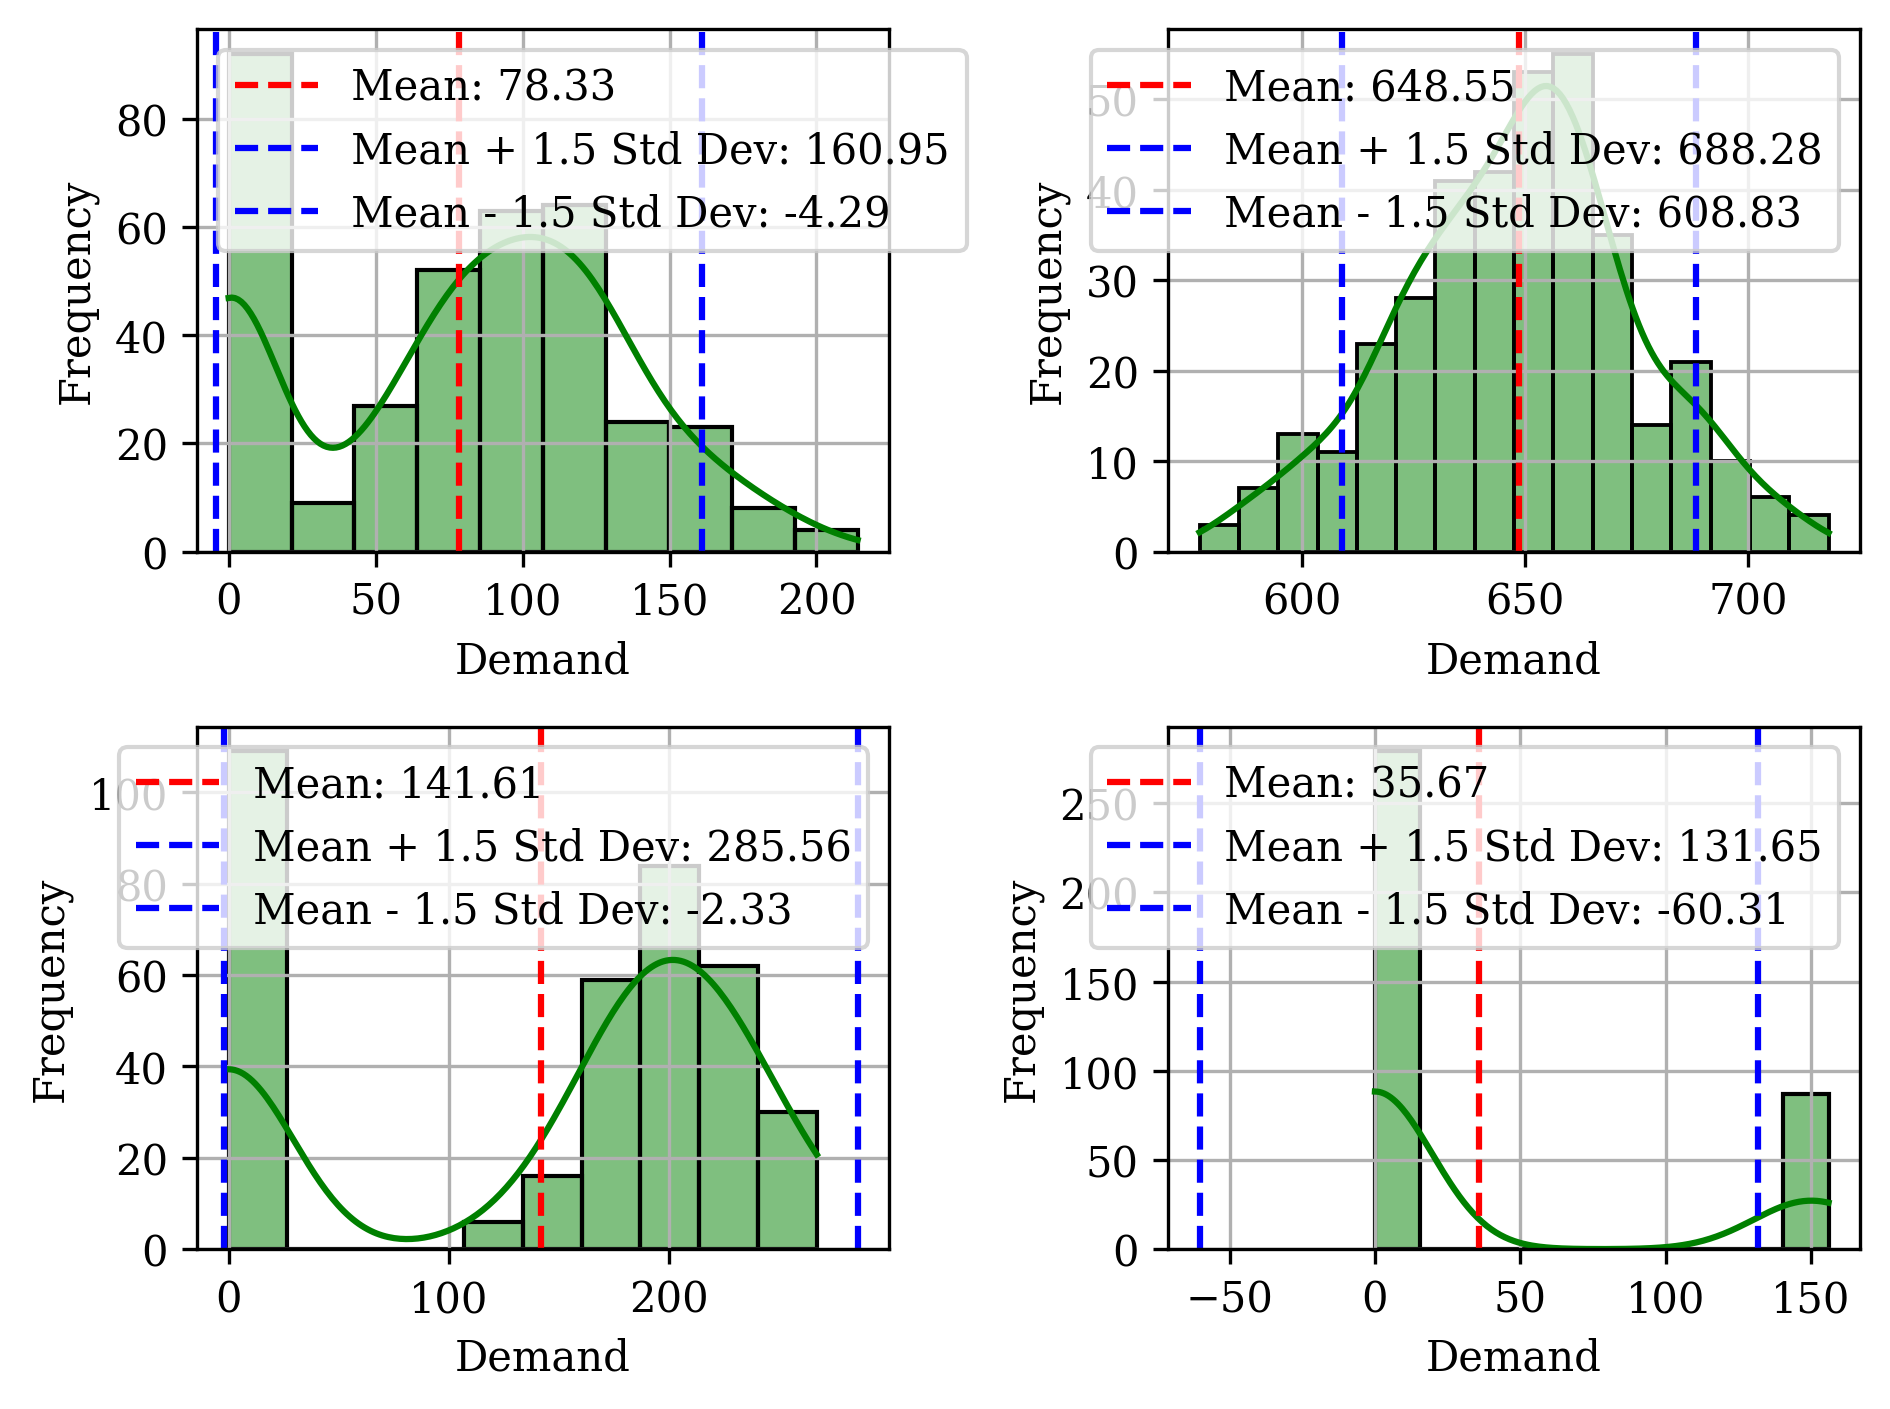

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate mean and standard deviation for each product
mean_values = demand.mean()
std_devs = demand.std()

# Calculate 1.5 times the standard deviation for each product
one_and_half_std_devs = 1.5 * std_devs

# Plot histograms for each product with mean and 1.5 * standard deviation lines
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=300)

for i, ax in enumerate(axes.flat, start=1):
    sns.histplot(demand[i], ax=ax, color='green', kde=True)
    ax.axvline(mean_values[i], color='red', linestyle='--', label=f'Mean: {mean_values[i]:.2f}')
    ax.axvline(mean_values[i] + one_and_half_std_devs[i], color='blue', linestyle='--', label=f'Mean + 1.5 Std Dev: {mean_values[i] + one_and_half_std_devs[i]:.2f}')
    ax.axvline(mean_values[i] - one_and_half_std_devs[i], color='blue', linestyle='--', label=f'Mean - 1.5 Std Dev: {mean_values[i] - one_and_half_std_devs[i]:.2f}')
    ax.set_xlabel('Demand')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()


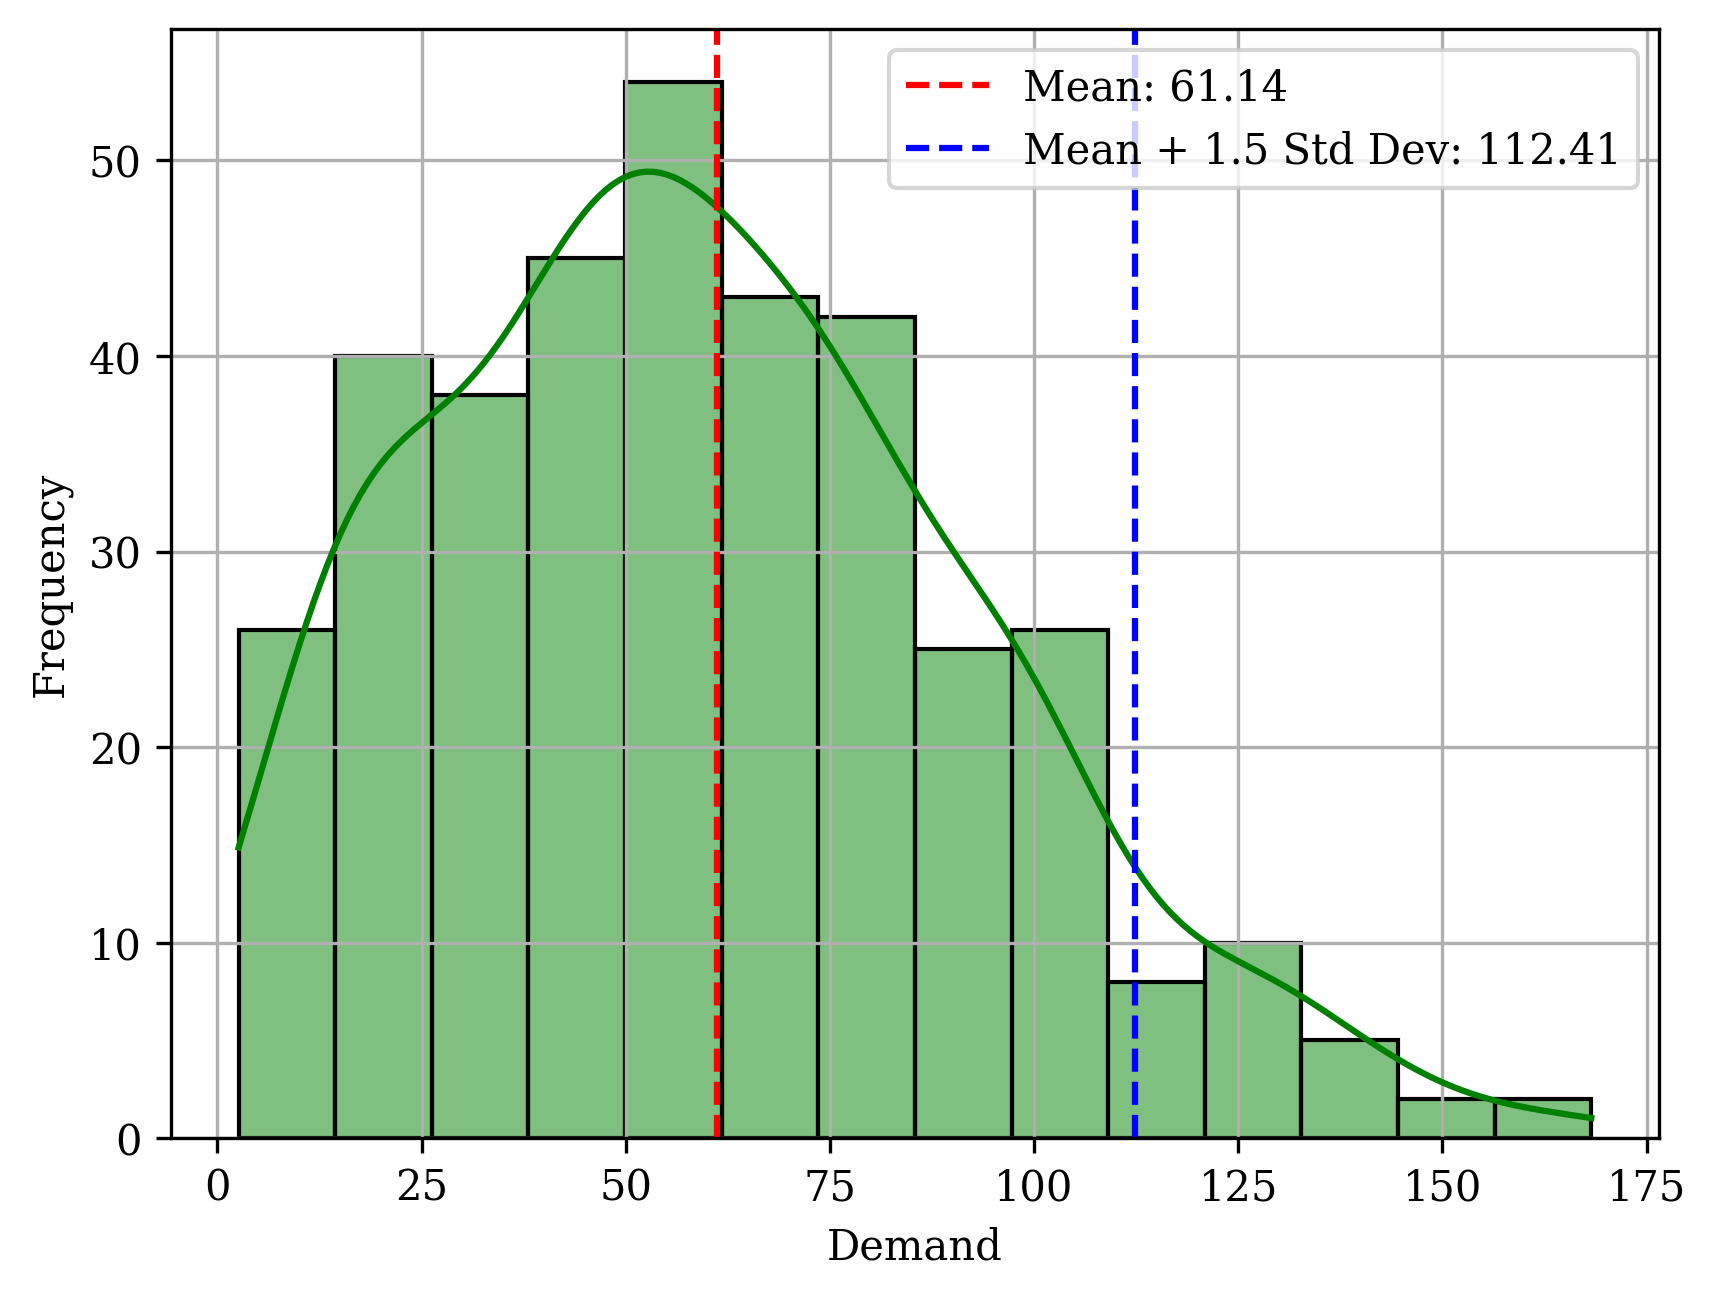

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import beta

# Generate parameters for the beta distribution
alpha = 2  # Shape parameter
beta_param = 5  # Shape parameter
loc = demand[1].min()  # Minimum demand value
scale = demand[1].max() - demand[1].min()  # Scale parameter

# Generate beta distribution data
beta_data = beta.rvs(alpha, beta_param, loc=loc, scale=scale, size=len(demand[1]))

# Calculate mean and 1.5 standard deviations
mean_value = beta.mean(alpha, beta_param, loc=loc, scale=scale)
std_dev = beta.std(alpha, beta_param, loc=loc, scale=scale)
mean_plus_1_5_std_dev = mean_value + 1.5 * std_dev

# Plot the beta distribution for demand 1
plt.figure(dpi=300)
sns.histplot(beta_data, color='green', kde=True)
plt.axvline(x=mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(x=mean_plus_1_5_std_dev, color='blue', linestyle='--', label=f'Mean + 1.5 Std Dev: {mean_plus_1_5_std_dev:.2f}')
plt.xlabel('Demand')
plt.ylabel('Frequency')
# plt.title('Beta Distribution for Demand 1')
plt.legend()
plt.show()




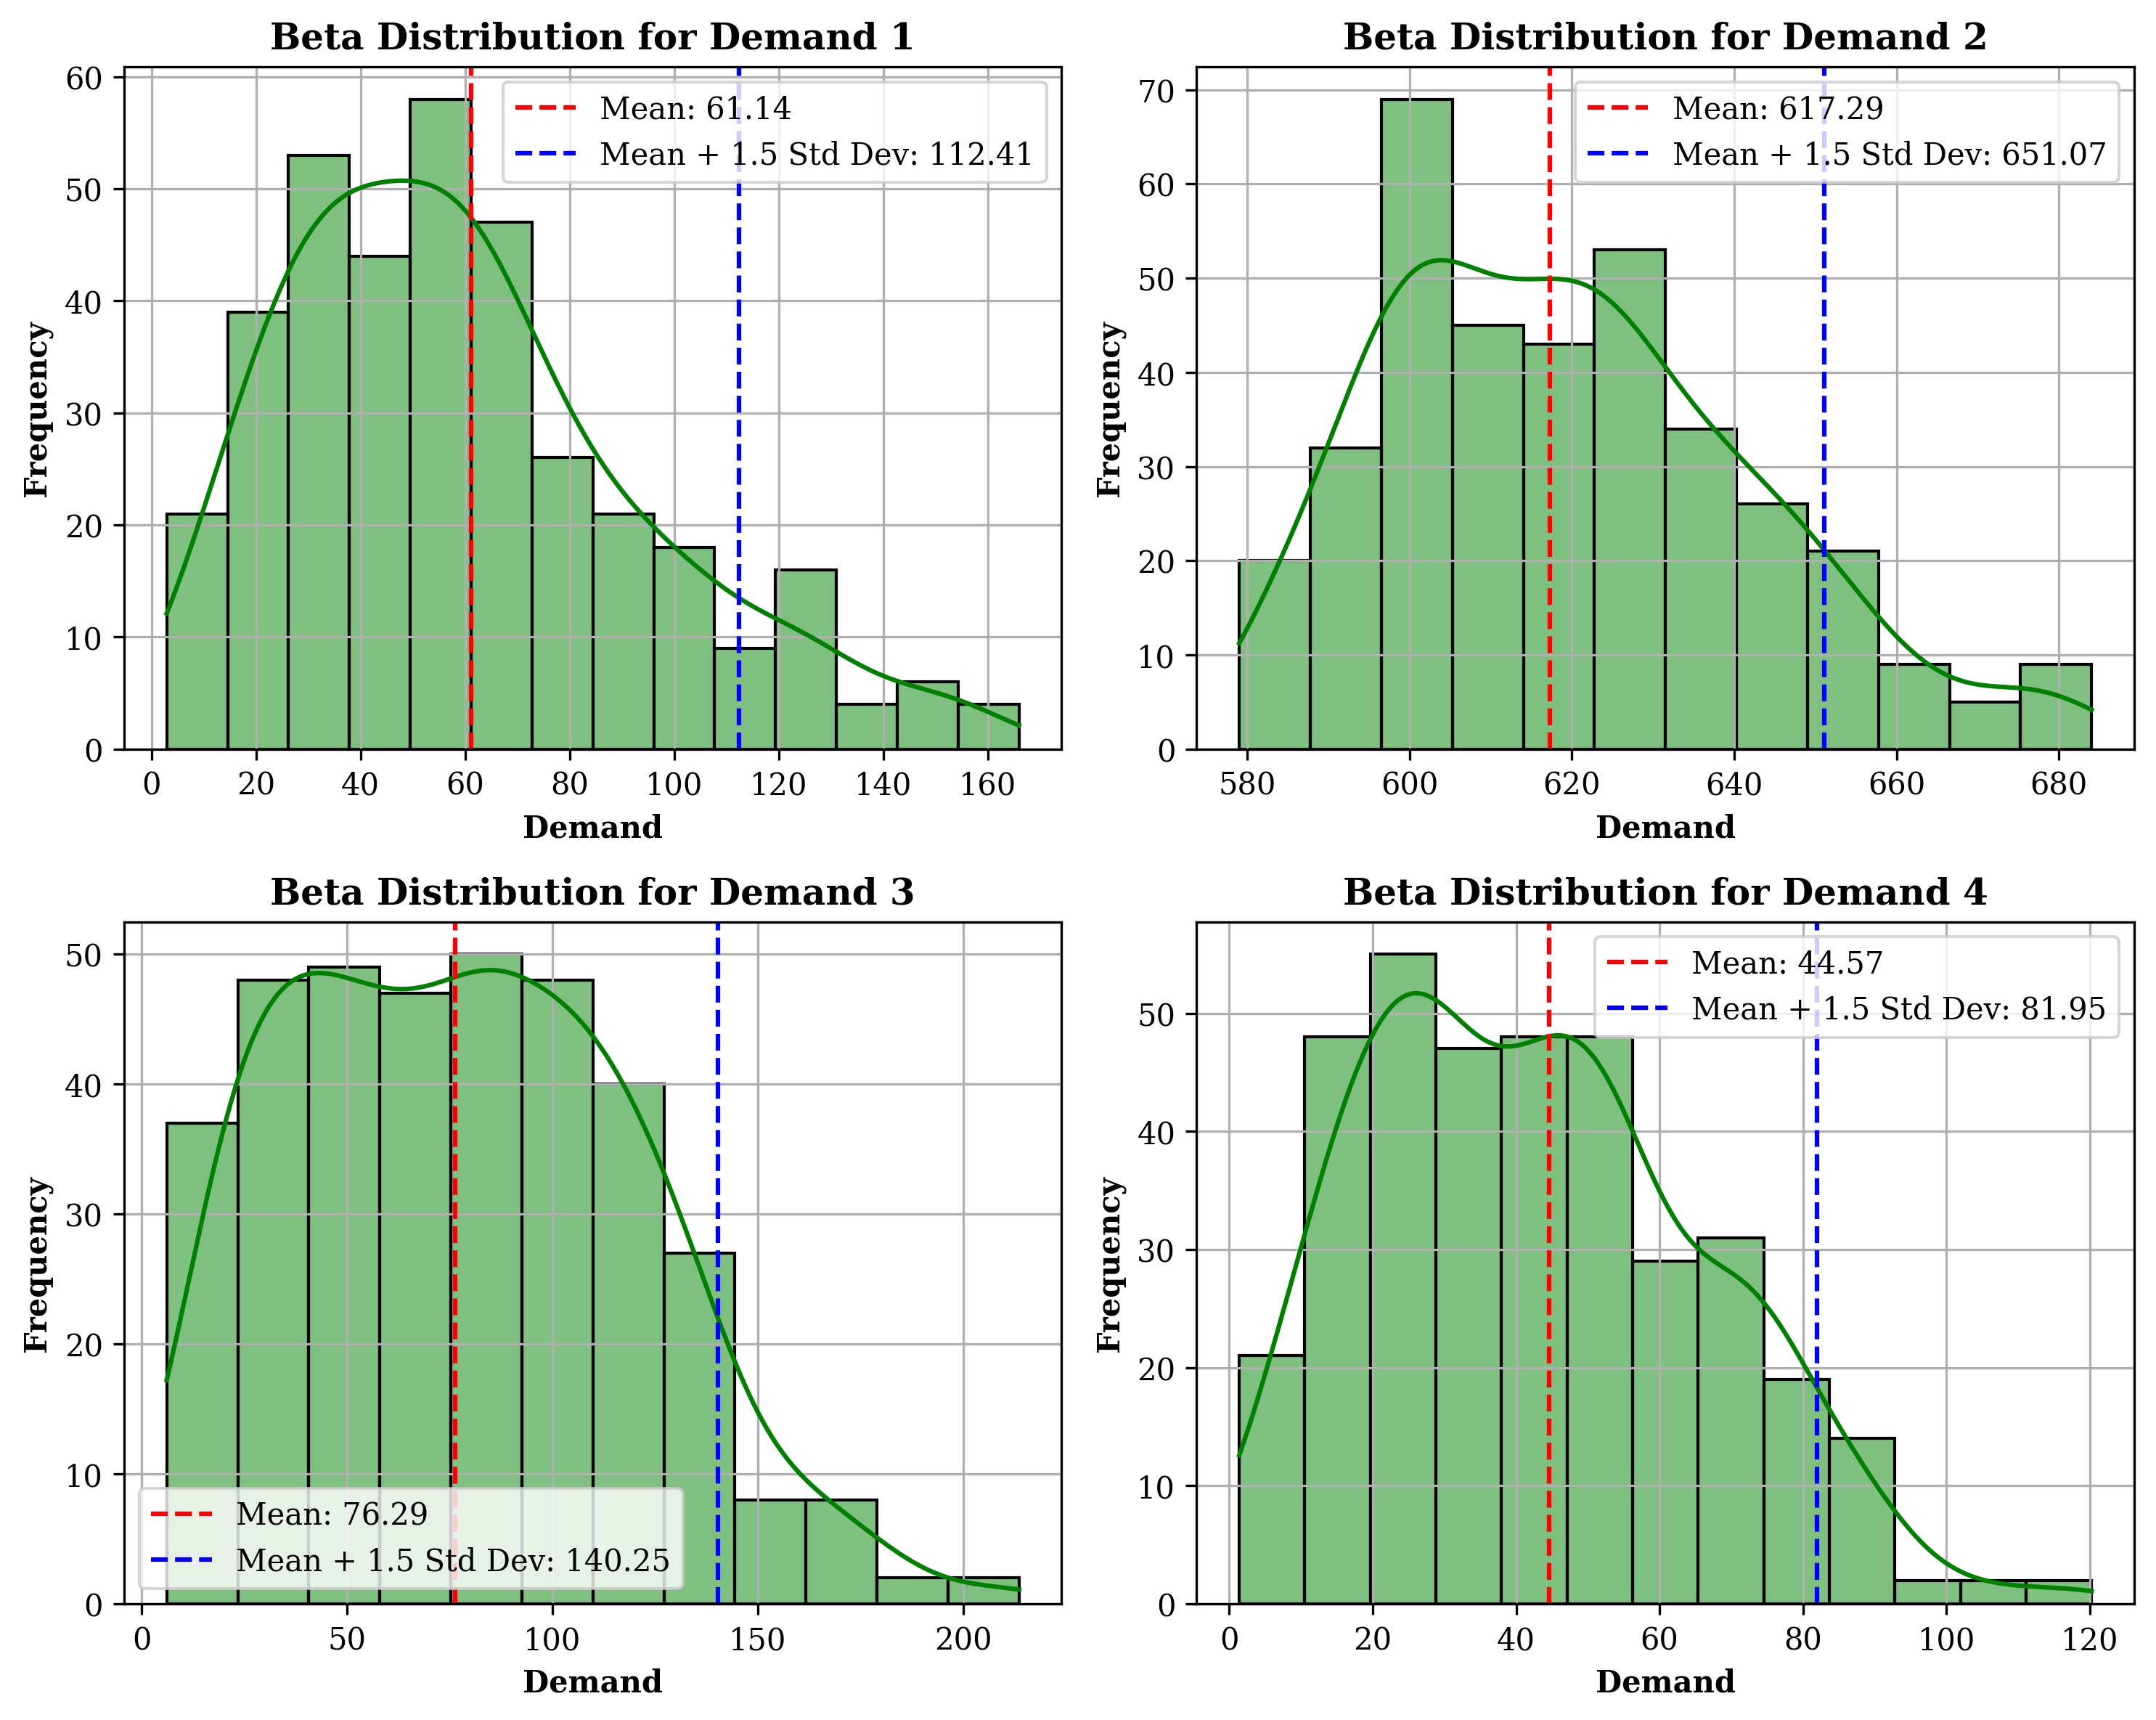

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import beta

def plot_beta_distribution(product_demand):
    # Fit beta distribution to demand data
    alpha = 2  # Shape parameter
    beta_param = 5  # Shape parameter
    loc = product_demand.min()  # Minimum demand value
    scale = product_demand.max() - product_demand.min()  # Scale parameter

    # Generate beta distribution data
    beta_data = beta.rvs(alpha, beta_param, loc=loc, scale=scale, size=len(product_demand))

    # Calculate mean and 1.5 standard deviations
    mean_value = beta.mean(alpha, beta_param, loc=loc, scale=scale)
    std_dev = beta.std(alpha, beta_param, loc=loc, scale=scale)
    mean_plus_1_5_std_dev = mean_value + 1.5 * std_dev

    # Plot the beta distribution
    sns.histplot(beta_data, color='green', kde=True)
    plt.axvline(x=mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    plt.axvline(x=mean_plus_1_5_std_dev, color='blue', linestyle='--', label=f'Mean + 1.5 Std Dev: {mean_plus_1_5_std_dev:.2f}')
    plt.xlabel('Demand', fontweight='bold')
    plt.ylabel('Frequency', fontweight='bold')
    plt.legend()

# Plot beta distributions for all products
plt.figure(figsize=(10, 8), dpi=300)
for i in range(1, 5):
    plt.subplot(2, 2, i)
    plot_beta_distribution(demand[i])
    plt.title(f'Beta Distribution for Demand {i}', fontweight='bold')

plt.tight_layout()
plt.show()
